<a href="https://colab.research.google.com/github/Sunantha17/PCA/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Using inbuilt datset of scikit
from sklearn.datasets import load_wine

# Using PCA for dimensionality reduction
from sklearn.decomposition import PCA

# loading wine datset
data = load_wine()
winedata = pd.DataFrame(data.data, columns=data.feature_names)
winedata['target'] = pd.Series(data.target)

print("Shape of wine data", winedata.shape)


Shape of wine data (178, 14)


In [7]:
# Inputting the features from the columns (0 to 12) except category columm and all the rows
Inputs = winedata.iloc[:, 0:13]

# Category column data values stored in diffrent variable
target_column = winedata.iloc[:,13]

#Declaring the number of components 2 to reduce dimensions using PCA from 13 dimensions into 2 dimensions
numComponents = 2

# Fits PCA on the data, calculating the principal components.
pca = PCA(n_components=numComponents)
pca.fit(Inputs)

# Transforms the  data to the reduced 2-dimensional space
projected_wine_data = pca.transform(Inputs)

# Creates a DataFrame projected_wine_data with the transformed data and names the columns as 'pc1' and 'pc2'
projected_wine_data = pd.DataFrame(projected_wine_data,columns=['pc1','pc2'])

projected_wine_data['target'] = winedata['target']

display(projected_wine_data)


,pc1,pc2,target
0,318.562979,21.492131,0
1,303.097420,-5.364718,0
2,438.061133,-6.537309,0
3,733.240139,0.192729,0
4,-11.571428,18.489995,0
...,...,...,...
173,-6.980211,-4.541137,2
174,3.131605,2.335191,2
175,88.458074,18.776285,2
176,93.456242,18.670819,2


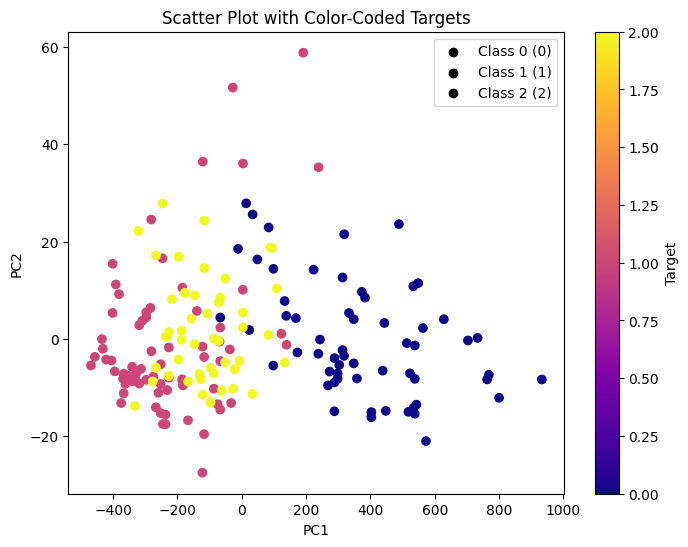

In [8]:
# Scatter plot for PC components with target color code
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(projected_wine_data['pc1'], projected_wine_data['pc2'], c=projected_wine_data['target'], cmap='plasma')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Target')
plt.title('Scatter Plot with Color-Coded Targets')

target_classes = [0, 1, 2]
class_labels = ['Class 0', 'Class 1', 'Class 2']

# legend entries
for target_class, class_label in zip(target_classes, class_labels):
    plt.scatter([], [], c='k', label=f'{class_label} ({target_class})')

plt.legend()
plt.show()



In [9]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Using inbuilt datset of scikit
from sklearn.datasets import load_wine

# Using PCA for dimensionality reduction
from sklearn.decomposition import PCA

# loading wine datset
winedata = load_wine()
winedata = pd.DataFrame(data.data, columns=data.feature_names)
winedata['target'] = pd.Series(data.target)

# preprocessing module used for standardizing features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

# Inputting the features from the columns (0 to 12) except category columm and all the rows
Inputs = winedata.iloc[:, 0:13]

# Category column data values stored in diffrent variable
target_column = winedata.iloc[:,13]

# Using standard scaler fit method on inputs to compute mean and standard deviation
statistics = StandardScaler().fit(Inputs)

# Using transform method on computed values to scale and centre bassed on the mean and standard deviation
x = statistics.transform(Inputs)

# Printing transformed data
print("Transformed data is " '\n', x)

# Printing the mean of each feature across the transformed data and it should be calculated along columns
print("Mean of Transformed data is "'\n', x.mean(axis=0))

# Printing the standard deviation of each feature across the transformed data and it should be calculated along columns
print("Standard Deviation of Transformed data is " '\n', x.std(axis=0))

# Printing the shape of transformed data
print("Shape of Transformed data is " '\n', x.shape)



Transformed data is 
 [[ 1.51861254 -0.5622498   0.23205254 ...  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 ...  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 ...  0.31830389  0.78858745
   1.39514818]
 ...
 [ 0.33275817  1.74474449 -0.38935541 ... -1.61212515 -1.48544548
   0.28057537]
 [ 0.20923168  0.22769377  0.01273209 ... -1.56825176 -1.40069891
   0.29649784]
 [ 1.39508604  1.58316512  1.36520822 ... -1.52437837 -1.42894777
  -0.59516041]]
Mean of Transformed data is 
 [ 7.84141790e-15  2.44498554e-16 -4.05917497e-15 -7.11041712e-17
 -2.49488320e-17 -1.95536471e-16  9.44313292e-16 -4.17892936e-16
 -1.54059038e-15 -4.12903170e-16  1.39838203e-15  2.12688793e-15
 -6.98567296e-17]
Standard Deviation of Transformed data is 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Shape of Transformed data is 
 (178, 13)


In [10]:
# Declaring the number of components 2 to reduce dimensions using PCA from 13 dimensions into 2 dimensions
numComponents = 2

# Fits PCA on the standardized data x, calculating the principal components.
pca = PCA(n_components=numComponents)
pca.fit(x)

# Transforms the standardized data to the reduced 2-dimensional space
projected_wine_scaled_data = pca.transform(x)

# Creates a DataFrame projected_wine_data with the transformed data and names the columns as 'pc1' and 'pc2'
projected_wine_scaled_data = pd.DataFrame(projected_wine_scaled_data,columns=['pc1','pc2'])

# Displays the reduced data with two principal components (pc1 and pc2) with target column
projected_wine_scaled_data['target'] = winedata['target']
display(projected_wine_scaled_data)

,pc1,pc2,target
0,3.316751,-1.443463,0
1,2.209465,0.333393,0
2,2.516740,-1.031151,0
3,3.757066,-2.756372,0
4,1.008908,-0.869831,0
...,...,...,...
173,-3.370524,-2.216289,2
174,-2.601956,-1.757229,2
175,-2.677839,-2.760899,2
176,-2.387017,-2.297347,2


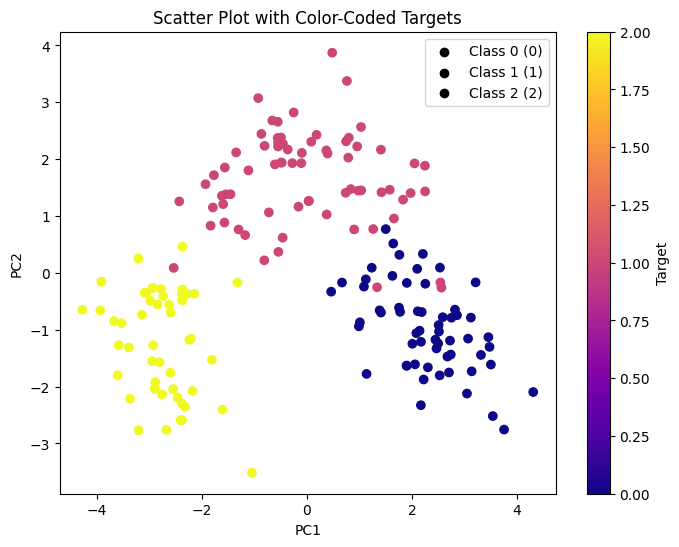

In [11]:
# Plotting the graph on principal components for the scaled data
import matplotlib.pyplot as pl
plt.figure(figsize=(8, 6))
plt.scatter(projected_wine_scaled_data['pc1'], projected_wine_scaled_data['pc2'], c=projected_wine_scaled_data['target'], cmap='plasma')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Target')
plt.title('Scatter Plot with Color-Coded Targets')

target_classes = [0, 1, 2]
class_labels = ['Class 0', 'Class 1', 'Class 2']

# Adding legend entries
for target_class, class_label in zip(target_classes, class_labels):
    plt.scatter([], [], c='k', label=f'{class_label} ({target_class})')

plt.legend()
plt.show()

In [12]:
# variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Explained variance for PC1 and PC2
variance_pc1 = explained_variance_ratio[0]  # Variance explained by PC1
variance_pc2 = explained_variance_ratio[1]  # Variance explained by PC2

# Calculate cumulative variance explained by PC1 and PC2
cumulative_variance = explained_variance_ratio.cumsum()
cumulative_variance_pc2 = cumulative_variance[1]  # Cumulative variance explained by PC1 and PC2

print(f"Variance explained by PC1: {variance_pc1 * 100:.2f}%")
print(f"Variance explained by PC2: {variance_pc2 * 100:.2f}%")
print(f"Cumulative variance explained by PC1 and PC2: {cumulative_variance_pc2 * 100:.2f}%")


Variance explained by PC1: 36.20%
Variance explained by PC2: 19.21%
Cumulative variance explained by PC1 and PC2: 55.41%
